# Multiple Linear Regression using Housing dataframe

#### from YBI Foundation with edits

In [46]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [47]:
import pandas as pd

In [48]:
# import data
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Boston.csv')

In [49]:
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [51]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [52]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [53]:
# define target (y) and features (X)
y = df['MEDV']
X = df.drop(['MEDV'],axis=1)

In [54]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

In [55]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [56]:
# select model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [57]:
# fit model
lr.fit(X_train,y_train)

LinearRegression()

In [58]:
lr.intercept_

34.21916368863054

In [59]:
lr.coef_

array([-1.29412069e-01,  3.65184937e-02,  1.54418944e-02,  2.35486887e+00,
       -2.04171489e+01,  4.41356565e+00,  4.61075512e-03, -1.58626723e+00,
        2.51478665e-01, -9.59591213e-03, -9.64169204e-01,  1.00972679e-02,
       -5.43198745e-01])

In [60]:
# predict model
y_pred = lr.predict(X_test)

In [61]:
y_pred

array([31.71733828, 22.02143302, 21.16613197, 39.77837246, 20.10258512,
       22.86056216, 18.35574643, 14.7902735 , 22.55778646, 21.34594953,
       18.38491085, 27.9664665 , 29.85929012,  6.44680773, 10.68297311,
       26.24809521, 21.89368671, 25.22692365,  3.62385942, 36.21920372,
       24.07812335, 22.94103934, 14.27095261, 20.79013279, 24.22725035,
       16.7379611 , 18.74856986, 20.96709658, 28.513571  , 20.86346628,
        9.23450577, 17.06754852, 22.06953886, 22.23121875, 39.25875323,
       26.16769924, 42.50354003, 19.34517962, 34.51869058, 14.07023676,
       13.81055358, 23.27727535, 11.79100403,  9.01040731, 21.64587594,
       25.55339317, 18.16941728, 16.81991401, 14.66170215, 14.86477172,
       33.78924259, 33.26959074, 15.49208778, 24.08269034, 27.63531226,
       19.58288727, 45.02488529, 20.96959671, 20.07202649, 27.67146866,
       34.59154418, 12.71353064, 23.66247812, 31.65792337, 28.97459925,
       32.45963484, 13.93494747, 35.491924  , 19.35871482, 19.60

In [62]:
# model accuracy
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [63]:
mean_absolute_error(y_test,y_pred)

3.1550309276025046

In [64]:
mean_absolute_percentage_error(y_test,y_pred)

0.16355935882218015

In [65]:
mean_squared_error(y_test,y_pred)

20.71801287783852

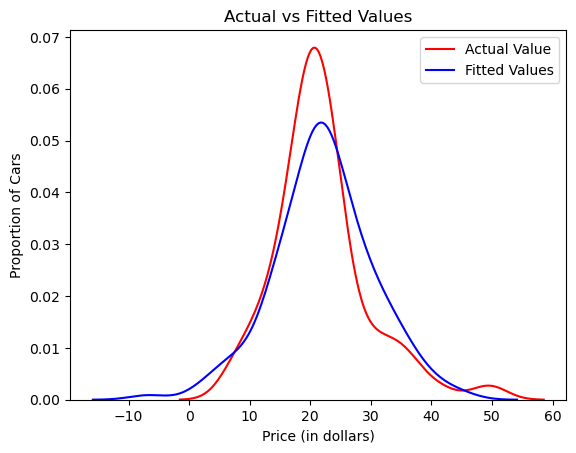

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.legend()

plt.title('Actual vs Fitted Values')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()